In [1]:
'''To begin, let's generate some random data to work with. Ensure that a common random number seed is used to 
    generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing 
    randomly generated uniformly distributed integers from 1 to 10000.  You may use the numpy package for this.  '''

import numpy as np
import pandas as pd
import time

np.random.seed(1)
array_1 = np.random.randint(1, 10000, 512)
np.random.seed(1)
array_2 = np.random.randint(1, 10000, 1024)
np.random.seed(1)
array_3 = np.random.randint(1, 10000, 2048)
np.random.seed(1)
array_4 = np.random.randint(1, 10000, 4096)
np.random.seed(1)
array_5 = np.random.randint(1, 10000, 8192)


In [2]:
"""Sort each of the random number arrays from smallest to largest.  You may use any algorithm to sort the data."""
# using the textbook codes
def findSmallest(arr):
    smallest = arr[0]
    smallest_index = 0
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
        
    return [smallest, smallest_index]

def selectionSort(arr):
    newArr = []
    for i in range(len(arr)):
        smallest = findSmallest(arr)[0]
        smallest_index = findSmallest(arr)[1]
        arr = np.delete(arr, smallest_index, axis=0)
        newArr.append(smallest)
    return newArr

# Get the execution time
def sort_time(ls):
    start_time = time.time()
    value = selectionSort(ls)
    end_time = time.time()
    return value, end_time - start_time

In [3]:
arr_1, sort_1 = sort_time(array_1)
arr_2, sort_2 = sort_time(array_2)
arr_3, sort_3 = sort_time(array_3)
arr_4, sort_4 = sort_time(array_4)
arr_5, sort_5 = sort_time(array_5)

In [4]:
# Simple search / linear search
def linear_search(list, item):
    start_time = time.time()
    i = 0
    while i < len(list):
        if list[i] == item:
            # return if item is found
            end_time = time.time()
            return i, end_time - start_time
        else:
            i = i + 1
    end_time = time.time()
    return None, end_time - start_time
        

In [5]:
lin_1, lin_time1 = linear_search(arr_1, arr_1[len(arr_1)-1])
lin_2, lin_time2 = linear_search(arr_2, arr_2[len(arr_2)-1])
lin_3, lin_time3 = linear_search(arr_3, arr_3[len(arr_3)-1])
lin_4, lin_time4 = linear_search(arr_4, arr_4[len(arr_4)-1])
lin_5, lin_time5 = linear_search(arr_5, arr_5[len(arr_5)-1])

In [6]:
print(lin_5, lin_time5)

8191 0.002249479293823242


In [7]:
"""Execute the base search algorithm (binary search) (from the text and github code) for each of array, 
noting the execution time for each array.  With each execution use the maximum value of the random number 
array as the number for which you are searching."""
# using the book codes
def binary_search(list, item): 
    # low and high keep track of which part of the list you'll search in. 
    low = 0 
    high = len(list) - 1 


    # While you haven't narrowed it down to one element ... 
    while low <= high: 
        
        # ... check the middle element 
        mid = (low + high) // 2 
        guess = list[mid] 
        # Found the item. 
        if guess == item: 
            return mid 
        # The guess was too high. 
        if guess > item: 
            high = mid - 1 
        # The guess was too low. 
        else: 
            low = mid + 1 

    # Item doesn't exist 
    return None 
 
# Get the execution time
def exc_time(ls, item):
    start_time = time.time()
    value = binary_search(ls, item)
    end_time = time.time()
    return value, end_time - start_time

In [8]:
res_1, bin_1 = exc_time(arr_1, arr_1[len(arr_1)-1])
res_2, bin_2 = exc_time(arr_2, arr_2[len(arr_2)-1])
res_3, bin_3 = exc_time(arr_3, arr_3[len(arr_3)-1])
res_4, bin_4 = exc_time(arr_4, arr_4[len(arr_4)-1])
res_5, bin_5 = exc_time(arr_5, arr_5[len(arr_5)-1])

In [9]:
final_data = [[1, str(len(array_1)), sort_1, lin_time1, bin_1, sort_1+bin_1], [2, str(len(array_2)), sort_2, lin_time2, bin_2, sort_2+bin_2],
                  [3, str(len(array_3)), sort_3, lin_time3, bin_3, sort_3+bin_3], [4, str(len(array_4)), sort_4, lin_time4, bin_4, sort_4+bin_4],
                  [5, str(len(array_5)), sort_5, lin_time5, bin_5, sort_5+bin_5]]

# Create a dataframe to store the above data
final_data = pd.DataFrame(final_data, columns=["array_id", "size", "Sort_Time", "linear_search_Time", "Binary_Search_Time", "bi_sort_time"])

In [10]:
final_data

,array_id,size,Sort_Time,linear_search_Time,Binary_Search_Time,bi_sort_time
0,1,512,0.065742,0.000000,0.0,0.065742
1,2,1024,0.321465,0.000000,0.0,0.321465
2,3,2048,1.149085,0.004000,0.0,1.149085
3,4,4096,4.872174,0.001514,0.0,4.872174
4,5,8192,18.739835,0.002249,0.0,18.739835


#### Discuss Results #1
The above table and the plot below show that both algorithms (linear search and binary search) are pretty fast when the 
size of the data is less than 1024. Nevertheless, after that threshold, linear search start showing some slowness when
binary search stays constant at 0.0 millisecond.

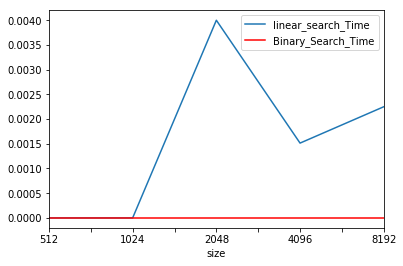

In [12]:
# Plot the data
# execution time against array size for linear and binary search algorithms
import matplotlib.pyplot as plt
ax = plt.gca()
final_data.plot(x='size', y='linear_search_Time', ax=ax)
final_data.plot(x='size', y='Binary_Search_Time', color="red", ax=ax)
plt.show()

#### Discuss Results #2
Since, bi_sort_time is the addition of binary search and sort_time, and the processing time for binary search stayed constant at zero millisecond throughout the five different sizes, the plot below shows that running binary search on any of those set of numbers from sorting to the worst case scenario, will only take the sorting processing time. 
Eventhough, the above plot shows that binary search is faster than linear search, the one below tells us that with the different sizes we were given to work with, linear search is still pretty fast.

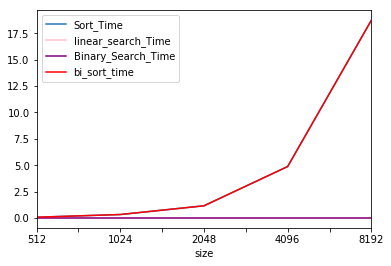

In [13]:
# execution time against array size for each form of the algorithm being tested
ax = plt.gca()
final_data.plot(x='size', y='Sort_Time', ax=ax)
final_data.plot(x='size', y='linear_search_Time', color="pink", ax=ax)
final_data.plot(x='size', y='Binary_Search_Time', color="purple", ax=ax)
final_data.plot(x='size', y='bi_sort_time', color="red", ax=ax)
plt.show()

### Executive Summary
Both binary and linear searches aim to find an item in a sorted list or sorted set of items. The differences between them are that linear search is a basic/simple search, meaning it will go through item one by one doing a comparison each time. For instance (taking from the book), "You have a phone number, and you want to find the person’s name in the phone book". This will make you go through the phone book page by page and name by name. This is simple search. In comparison, binary search works by dividing the proportion of the list that might contain the searched item in half. it does it repeatedly until it finds it. 
With those definitions in mind, our study above shows that processing time for both algorithms are not too different if the size of the data is relatively small. But as soon as it starts to increase in size, applying linear search will take more time compare to binary search. When apply linear search, the bigger the size the more time it will take to process hence O(n). with binary search, he running time is O(log(n)). That just means that the increase of size of items will also affect the run time for binary search but not as fast as it will affect linear search’s run time. 
